In [47]:
from tensorflow import keras
from tensorflow.keras import layers

encoding_dim = 32
input_img = keras.Input(shape=(3072,))

# Encoder layers
encoded = layers.Dense(512, activation='relu')(input_img)
encoded = layers.Dense(256, activation='relu')(encoded)
encoded = layers.Dense(128, activation='relu')(encoded)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

# Decoder layers
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(256, activation='relu')(decoded)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(3072, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)

# Extracting the encoder and decoder parts as separate models
encoder = keras.Model(input_img, encoded)

# Extracting the decoder part
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layers = autoencoder.layers[-5:]  # Decoder layers including the last one
decoder_output = encoded_input
for layer in decoder_layers:
    decoder_output = layer(decoder_output)
decoder = keras.Model(encoded_input, decoder_output)


In [48]:
# as if i am multiplying the last layer with the code layer to get the last output  of 784
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [49]:
def add_gaussian_noise(images, noise_factor=0.1): #It controls how much the random Gaussian noise affects the images.
    mu = 0  # Set your desired mean
    sigma = 1  # Set your desired standard deviation
    noisy_images = images + noise_factor * (sigma * np.random.randn(*images.shape) + mu)
    #noisy_images = images + noise_factor * np.random.randn(*images.shape)
    noisy_images = np.clip(noisy_images, 0.0, 1.0)  # Clip values to stay within [0, 1] range
    return noisy_images



In [50]:
from tensorflow.keras.datasets import cifar10
# Load CIFAR-10 dataset
import numpy as np

(train_images, _), (test_images, _) = cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

print(train_images.shape)
print(test_images.shape)
# Add Gaussian noise to train_images and test_images
noise_factor = 0.2  # Adjust the noise factor as needed
noisy_train_images = add_gaussian_noise(train_images, noise_factor)
noisy_test_images = add_gaussian_noise(test_images, noise_factor)
autoencoder.summary()

(50000, 3072)
(10000, 3072)
Model: "model_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_52 (InputLayer)       [(None, 3072)]            0         
                                                                 
 dense_139 (Dense)           (None, 512)               1573376   
                                                                 
 dense_140 (Dense)           (None, 256)               131328    
                                                                 
 dense_141 (Dense)           (None, 128)               32896     
                                                                 
 dense_142 (Dense)           (None, 64)                8256      
                                                                 
 dense_143 (Dense)           (None, 32)                2080      
                                                                 
 dense_144 (Dense)           (

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(noisy_train_images, train_images, epochs=5, batch_size=128, shuffle=True)


Epoch 1/5
391/391 [==============================] - 25s 56ms/step - loss: 0.6407
Epoch 2/5
391/391 [==============================] - 23s 59ms/step - loss: 0.6181
Epoch 3/5
391/391 [==============================] - 21s 55ms/step - loss: 0.6110
Epoch 4/5
391/391 [==============================] - 16s 40ms/step - loss: 0.6062
Epoch 5/5
391/391 [==============================] - 15s 39ms/step - loss: 0.6029


In [6]:
# Reconstruction using the trained autoencoder
encoded_imgs = encoder.predict(test_images)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 3ms/step


In [7]:
decoded_imgs.shape


(10000, 3072)

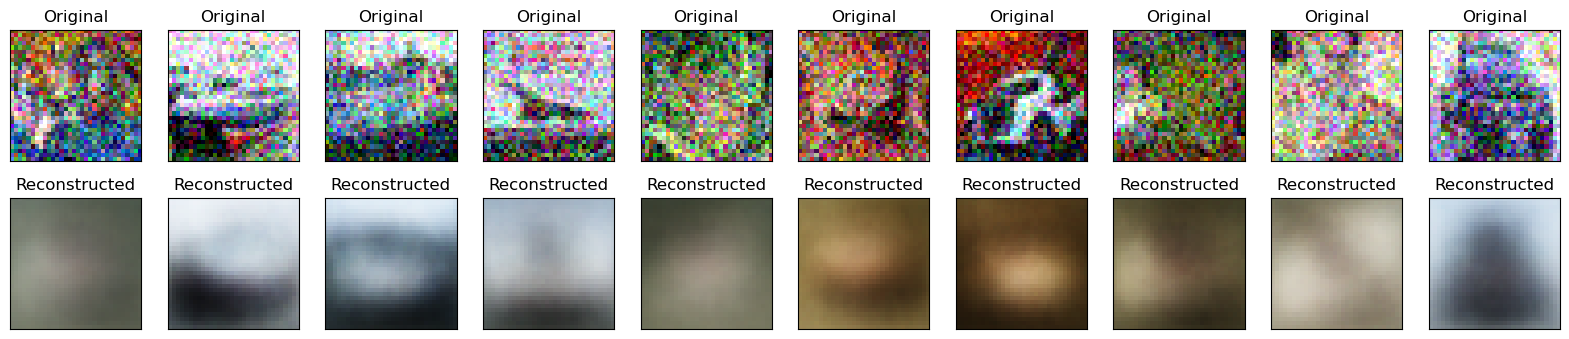

In [9]:
# Plotting the original and reconstructed images
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(noisy_test_images[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Original")

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Reconstructed")
plt.show()

In [12]:
# Model compilation and training remain unchanged
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(train_images, train_images, epochs=10, batch_size=128, shuffle=True)

# Reconstruction using the trained autoencoder
encoded_imgs = encoder.predict(noisy_test_images)
decoded_imgs = decoder.predict(encoded_imgs)


Epoch 1/10
391/391 [==============================] - 17s 41ms/step - loss: 0.5976
Epoch 2/10
391/391 [==============================] - 16s 41ms/step - loss: 0.5950
Epoch 3/10
391/391 [==============================] - 16s 40ms/step - loss: 0.5936
Epoch 4/10
391/391 [==============================] - 15s 39ms/step - loss: 0.5923
Epoch 5/10
391/391 [==============================] - 15s 38ms/step - loss: 0.5918
Epoch 6/10
391/391 [==============================] - 15s 38ms/step - loss: 0.5916
Epoch 7/10
391/391 [==============================] - 16s 40ms/step - loss: 0.5911
Epoch 8/10
391/391 [==============================] - 19s 47ms/step - loss: 0.5903
Epoch 9/10
391/391 [==============================] - 18s 46ms/step - loss: 0.5898
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


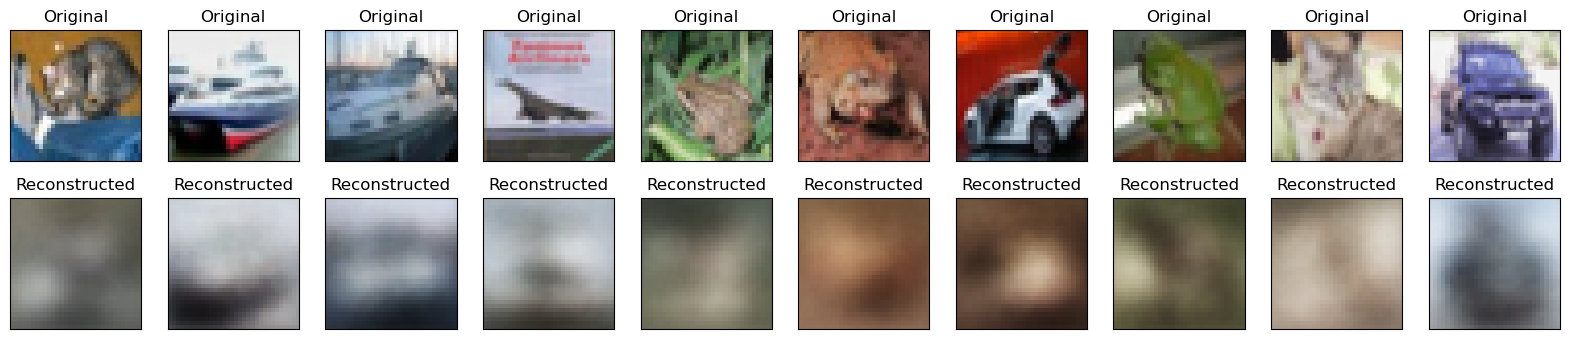

In [13]:
# Plotting the original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Original")

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Reconstructed")
plt.show()

In [57]:
from tensorflow.keras.datasets import cifar10
# Load CIFAR-10 dataset
import numpy as np

(train_images, _), (test_images, _) = cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
#train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
#test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

from tensorflow import keras
from tensorflow.keras import layers
encoding_dim=32

input_img = keras.Input(shape=(32, 32, 3))

# Replace Dense with Conv2D
encoded = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(input_img)
encoded = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)
encoded = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
encoded = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
encoded = layers.Conv2D(encoding_dim, (3, 3), activation='relu', padding='same')(encoded)

#flattened = layers.Flatten()(encoded)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(256, activation='relu')(decoded)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(3072, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)
# Extracting the encoder and decoder parts as separate models
encoder2 = keras.Model(input_img, encoded)

# Extracting the decoder part
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layers = autoencoder.layers[-5:]  # Decoder layers including the last one
decoder_output = encoded_input
for layer in decoder_layers:
    decoder_output = layer(decoder_output)
decoder2 = keras.Model(encoded_input, decoder_output)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()
#autoencoder.fit(train_images, train_images, epochs=50, batch_size=128, shuffle=True)
train_images.shape

Model: "model_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_60 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_150 (Conv2D)         (None, 32, 32, 512)       14336     
                                                                 
 conv2d_151 (Conv2D)         (None, 32, 32, 256)       1179904   
                                                                 
 conv2d_152 (Conv2D)         (None, 32, 32, 128)       295040    
                                                                 
 conv2d_153 (Conv2D)         (None, 32, 32, 64)        73792     
                                                                 
 conv2d_154 (Conv2D)         (None, 32, 32, 32)        18464     
                                                                 
 dense_169 (Dense)           multiple                  211

(50000, 32, 32, 3)

In [58]:
from tensorflow import keras
from tensorflow.keras import layers
encoding_dim=32
# Define the input layer
input_img = keras.Input(shape=(32, 32, 3))

# Create the encoder layers with Conv2D
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(input_img)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.Conv2D(encoding_dim, (3, 3), activation='relu', padding='same')(x)

# Create the decoder layers with Dense
x = layers.Dense(64, activation='relu')(encoded)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
decoded = layers.Dense(3072, activation='sigmoid')(x)

# Define the autoencoder model
autoencoder3 = keras.Model(input_img, decoded)

# Display the summary of the model
autoencoder3.summary()
# Extracting the encoder and decoder parts as separate models
encoder2 = keras.Model(input_img, encoded)

# Extracting the decoder part
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layers = autoencoder3.layers[-5:]  # Decoder layers including the last one
decoder_output = encoded_input
for layer in decoder_layers:
    decoder_output = layer(decoder_output)
decoder2 = keras.Model(encoded_input, decoder_output)
train_images.shape
autoencoder3.compile(optimizer='adam', loss='binary_crossentropy')

Model: "model_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_62 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_155 (Conv2D)         (None, 32, 32, 512)       14336     
                                                                 
 conv2d_156 (Conv2D)         (None, 32, 32, 256)       1179904   
                                                                 
 conv2d_157 (Conv2D)         (None, 32, 32, 128)       295040    
                                                                 
 conv2d_158 (Conv2D)         (None, 32, 32, 64)        73792     
                                                                 
 conv2d_159 (Conv2D)         (None, 32, 32, 32)        18464     
                                                                 
 dense_174 (Dense)           (None, 32, 32, 64)        211

In [312]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load images from 'eigen faces' directory
directory = 'C://Users//owner//shipsnet//shipsnet'
image_files = os.listdir(directory)

images = []
for file in image_files:
    if file.endswith('.jpg') or file.endswith('.png'):
        img_path = os.path.join(directory, file)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Error loading image: {img_path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (32, 32))
        images.append(img)

# Check if images were loaded
if not images:
    print("No valid images found in the directory.")
    exit()

# Convert images list to a NumPy array
images = np.array(images)

# Split the data into training and testing sets
xtrain, xtest = train_test_split(images, test_size=0.2, random_state=42)

# Normalize pixel values between 0 and 1 for both train and test sets
xtrain = xtrain.astype('float32') / 255.0
xtest = xtest.astype('float32') / 255.0

# Model compilation and training...
# Reconstruction and visualization code...


In [313]:
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
print(xtrain.shape)
print(xtest.shape)

(3200, 3072)
(800, 3072)


In [320]:
from tensorflow import keras
from tensorflow.keras import layers

encoding_dim = 32
input_img = keras.Input(shape=(3072,))

# Encoder layers
encoded = layers.Dense(512, activation='relu')(input_img)
encoded = layers.Dense(256, activation='relu')(encoded)
encoded = layers.Dense(128, activation='relu')(encoded)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

# Decoder layers
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(256, activation='relu')(decoded)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(3072, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)

# Extracting the encoder and decoder parts as separate models
encoder = keras.Model(input_img, encoded)

# Extracting the decoder part
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layers = autoencoder.layers[-5:]  # Decoder layers including the last one
decoder_output = encoded_input
for layer in decoder_layers:
    decoder_output = layer(decoder_output)
decoder = keras.Model(encoded_input, decoder_output)


In [321]:
 # as if i am multiplying the last layer with the code layer to get the last output  of 784
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
noise_factor = 0.2  # Adjust the noise factor as needed
noisy_train_images2 = add_gaussian_noise(xtrain, noise_factor)
noisy_test_images2 = add_gaussian_noise(xtest, noise_factor)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(noisy_train_images2, xtrain, epochs=50, batch_size=128, shuffle=True)


Epoch 1/50
25/25 [==============================] - 5s 36ms/step - loss: 0.6841
Epoch 2/50
25/25 [==============================] - 1s 32ms/step - loss: 0.6721
Epoch 3/50
25/25 [==============================] - 1s 32ms/step - loss: 0.6633
Epoch 4/50
25/25 [==============================] - 1s 32ms/step - loss: 0.6506
Epoch 5/50
25/25 [==============================] - 1s 32ms/step - loss: 0.6451
Epoch 6/50
25/25 [==============================] - 1s 32ms/step - loss: 0.6424
Epoch 7/50
25/25 [==============================] - 1s 31ms/step - loss: 0.6415
Epoch 8/50
25/25 [==============================] - 1s 32ms/step - loss: 0.6412
Epoch 9/50
25/25 [==============================] - 1s 32ms/step - loss: 0.6409
Epoch 10/50
25/25 [==============================] - 1s 32ms/step - loss: 0.6408
Epoch 11/50
25/25 [==============================] - 1s 36ms/step - loss: 0.6408
Epoch 12/50
25/25 [==============================] - 1s 38ms/step - loss: 0.6407
Epoch 13/50
25/25 [==================

In [322]:
encoded_imgs2 = encoder.predict(xtest)
decoded_imgs2 = decoder.predict(encoded_imgs2)


25/25 [==============================] - 3s 3ms/step


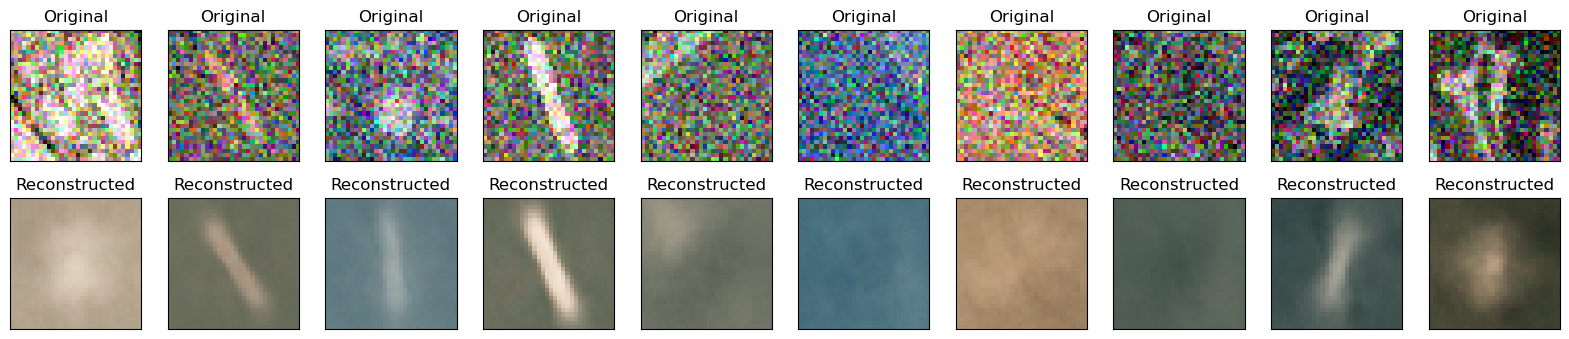

In [323]:
import matplotlib.pyplot as plt
# Plotting the original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(noisy_test_images2[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Original")

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs2[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Reconstructed")
plt.show()



In [324]:
# Model compilation and training remain unchanged
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(xtrain, xtrain, epochs=50, batch_size=128, shuffle=True)



Epoch 1/50
25/25 [==============================] - 5s 33ms/step - loss: 0.6610
Epoch 2/50
25/25 [==============================] - 1s 33ms/step - loss: 0.6378
Epoch 3/50
25/25 [==============================] - 1s 36ms/step - loss: 0.6342
Epoch 4/50
25/25 [==============================] - 1s 37ms/step - loss: 0.6333
Epoch 5/50
25/25 [==============================] - 1s 35ms/step - loss: 0.6329
Epoch 6/50
25/25 [==============================] - 1s 33ms/step - loss: 0.6327
Epoch 7/50
25/25 [==============================] - 1s 33ms/step - loss: 0.6326
Epoch 8/50
25/25 [==============================] - 1s 33ms/step - loss: 0.6325
Epoch 9/50
25/25 [==============================] - 1s 33ms/step - loss: 0.6324
Epoch 10/50
25/25 [==============================] - 1s 33ms/step - loss: 0.6322
Epoch 11/50
25/25 [==============================] - 1s 33ms/step - loss: 0.6320
Epoch 12/50
25/25 [==============================] - 1s 32ms/step - loss: 0.6319
Epoch 13/50
25/25 [==================

25/25 [==============================] - 3s 3ms/step


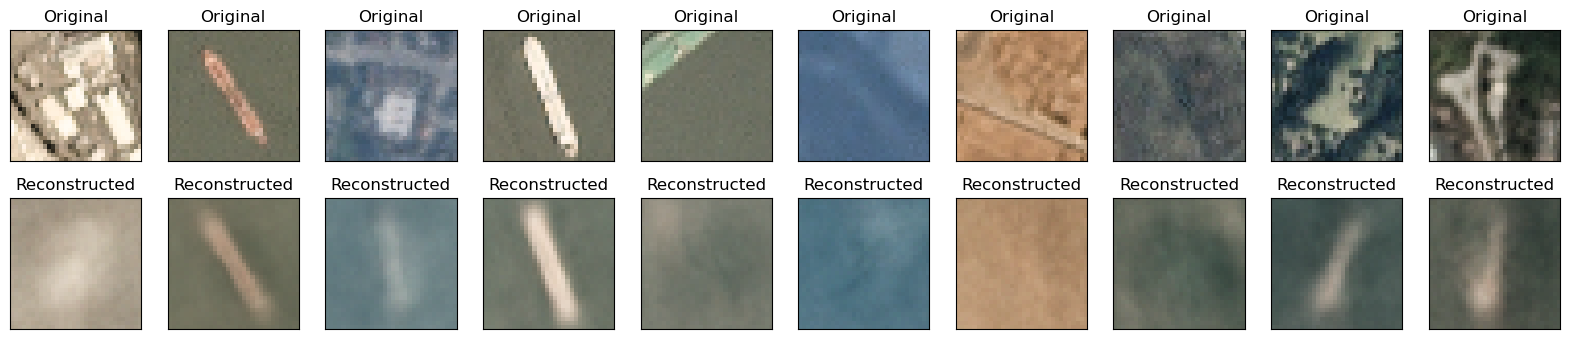

In [325]:
# Reconstruction using the trained autoencoder
encoded_imgs3 = encoder.predict(noisy_test_images2)
decoded_imgs3 = decoder.predict(encoded_imgs3)
# Plotting the original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Original")

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs3[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Reconstructed")
plt.show()